In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("D:\\Weather Project\\Chennai_1990_2022_Madras.csv")
df.head(5)

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


In [6]:
df.isnull().sum()

time       0
tavg      27
tmin    3084
tmax    1019
prcp    4886
dtype: int64

In [8]:
numeric_cols = ['tavg', 'tmin', 'tmax', 'prcp']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [9]:
df.isnull().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [10]:
df.describe()

,tavg,tmin,tmax,prcp
count,11894.000000,11894.000000,11894.000000,11894.000000
mean,28.490798,24.382770,33.908285,6.244378
std,2.602864,2.231123,3.232560,14.614421
min,20.900000,12.000000,23.800000,0.000000
25%,26.300000,23.400000,31.400000,0.000000
50%,28.700000,24.382770,33.908285,6.244378
75%,30.400000,25.800000,36.000000,6.244378
max,36.600000,31.000000,44.600000,344.900000


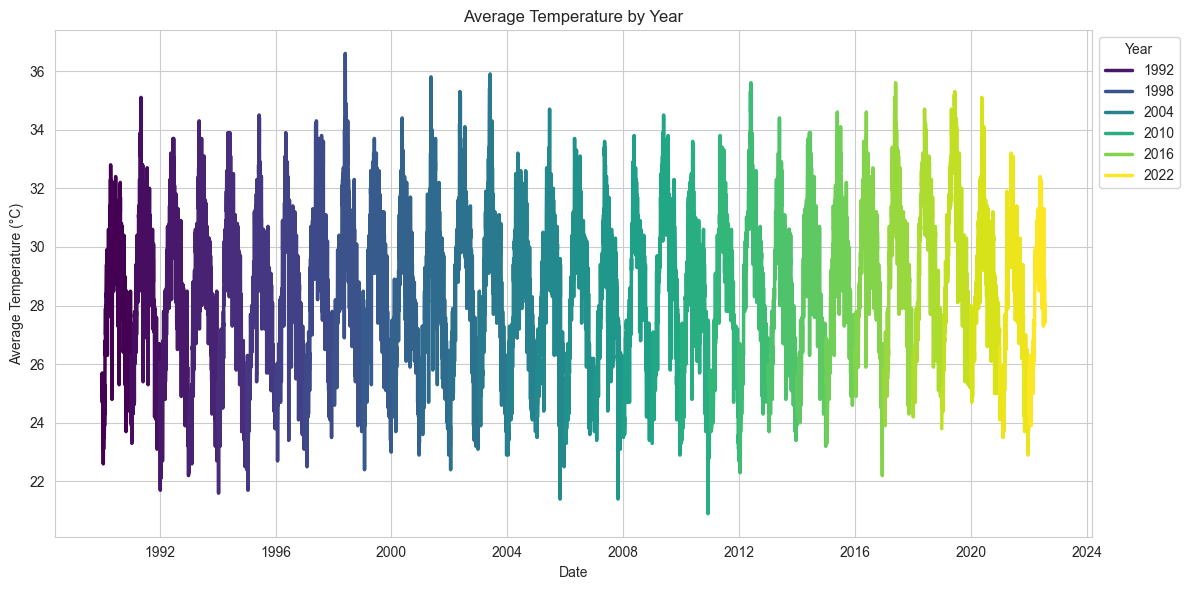

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot average temperature for each year in a single plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time', y='tavg', hue='year', palette='viridis', linewidth=2.5)
plt.title('Average Temperature by Year')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


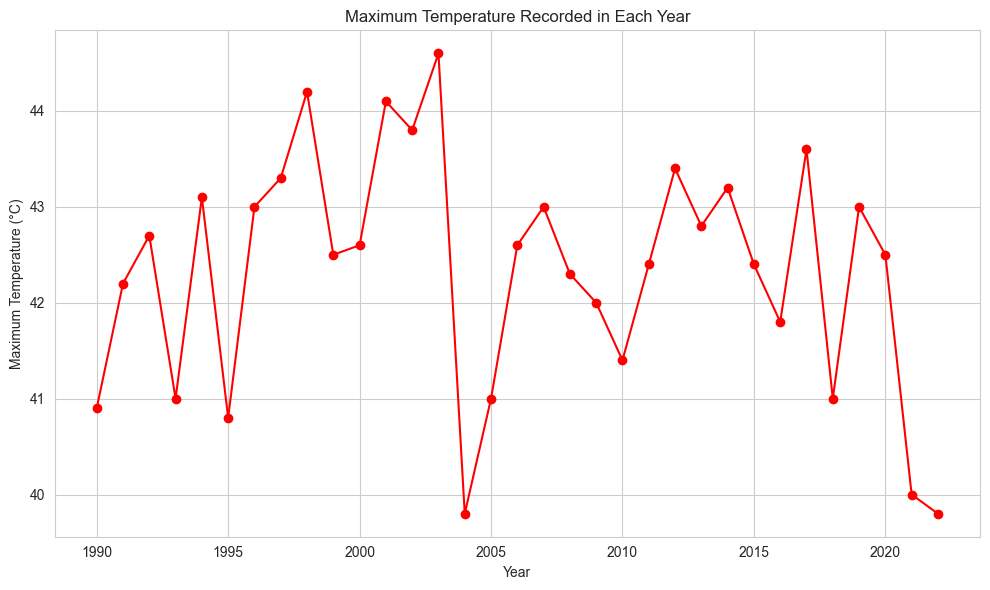

In [33]:
import matplotlib.pyplot as plt

# Group by year and calculate the maximum temperature for each year
max_temp_yearly = df.groupby('year')['tmax'].max()

# Plot the maximum temperature recorded in each year
plt.figure(figsize=(10, 6))
plt.plot(max_temp_yearly.index, max_temp_yearly.values, marker='o', linestyle='-', color='red')
plt.title('Maximum Temperature Recorded in Each Year')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


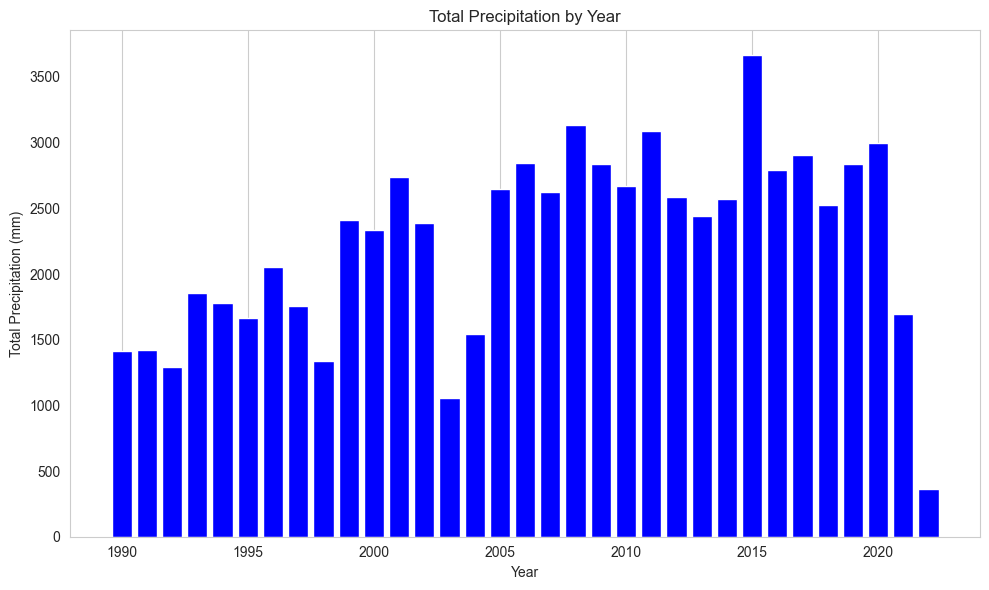

In [34]:
import matplotlib.pyplot as plt

# Calculate the total precipitation for each year
total_precipitation_yearly = df.groupby('year')['prcp'].sum()

# Plot the total precipitation for each year
plt.figure(figsize=(10, 6))
plt.bar(total_precipitation_yearly.index, total_precipitation_yearly.values, color='blue')
plt.title('Total Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\pugal\AppData\Local\Temp\ipykernel_16792\1839206427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='tavg', palette='Set3')


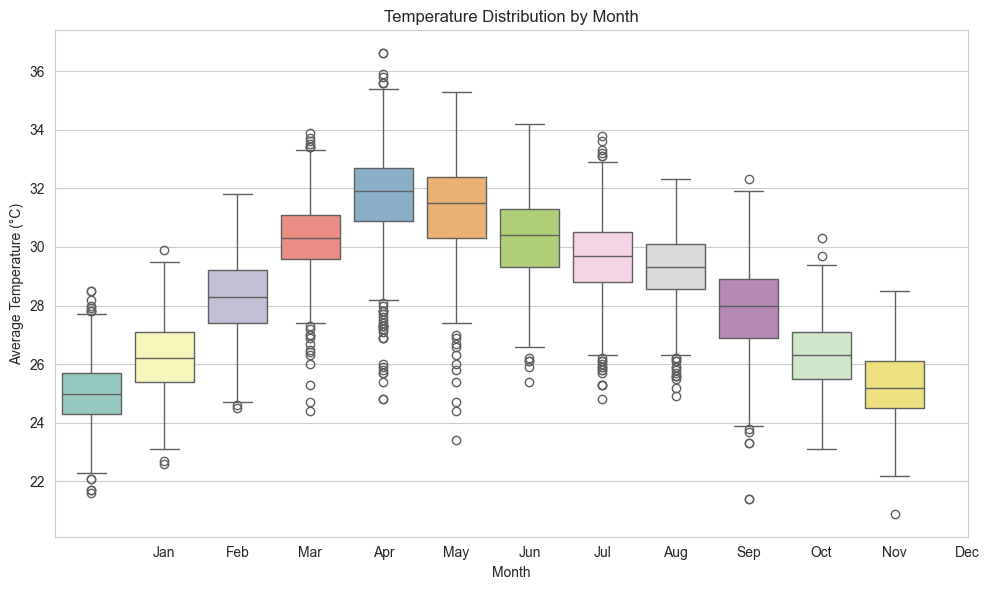

C:\Users\pugal\AppData\Local\Temp\ipykernel_16792\1839206427.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='prcp', palette='Set2')


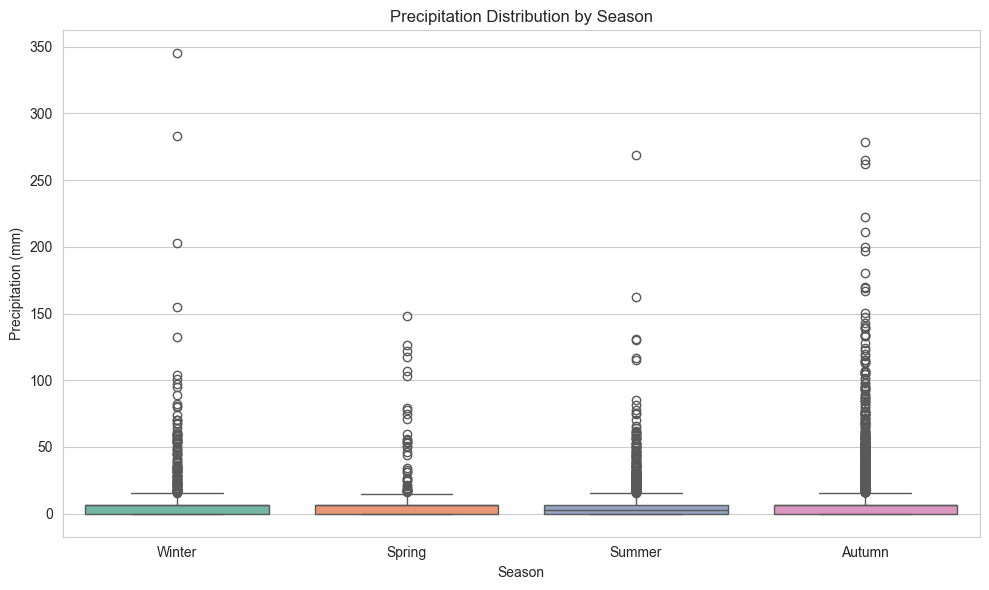

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by month
df['month'] = df['time'].dt.month
df['season'] = (df['month'] % 12 + 3) // 3  # Convert month to season (1: Winter, 2: Spring, 3: Summer, 4: Autumn)
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Create box plots of temperature or precipitation grouped by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='tavg', palette='Set3')
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Create box plots of temperature or precipitation grouped by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='prcp', palette='Set2')
plt.title('Precipitation Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()


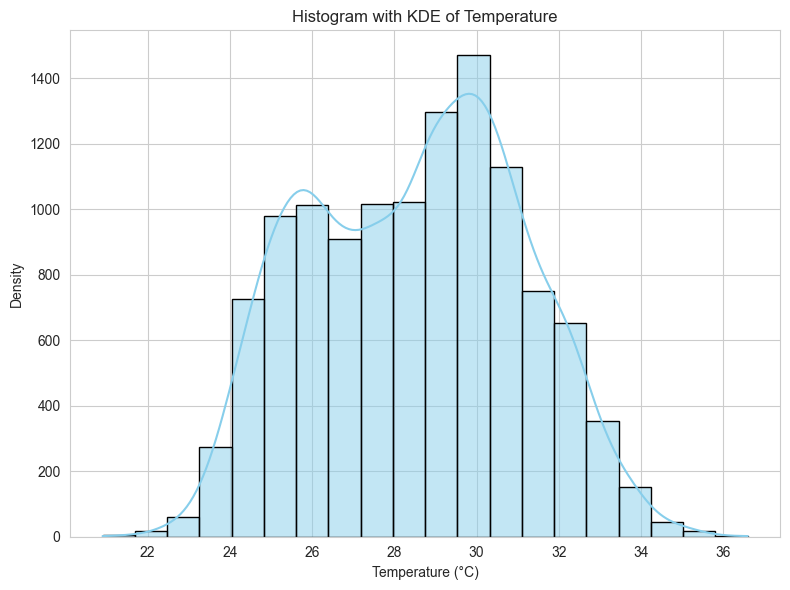

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with kernel density estimation (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df['tavg'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram with KDE of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()
